# CNN 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense,GlobalAveragePooling2D,MaxPooling2D,Activation,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam    



2024-09-08 09:12:36.608373: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-08 09:12:36.611395: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-08 09:12:36.620311: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-08 09:12:36.634459: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-08 09:12:36.638609: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-08 09:12:36.649807: I tensorflow/core/platform/cpu_feature_gu

In [2]:
img_width, img_height = 150, 150 # dimensions of our images.
# some prameters
train_data_dir = 'DS'
validation_data_dir = 'val'
nb_train_samples = 160
nb_validation_samples = 24
batch_size = 5
epochs = 20



In [3]:
# some img transforamtiona
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,height_shift_range=0.2,width_shift_range=0.2,rotation_range=20)
validation_datagen=ImageDataGenerator(rescale=1./255)
np.random.seed(42)

train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_height,img_width),batch_size=batch_size,class_mode='binary')# set as training data
validition_generator=validation_datagen.flow_from_directory(validation_data_dir,target_size=(img_height,img_width),batch_size=batch_size,class_mode='binary')# set as validation data

Found 160 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [7]:
classfier = Sequential()# create a model
classfier.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))# add a conv layer
classfier.add(MaxPooling2D(pool_size=(2, 2)))# add a pooling layer
classfier.add(Conv2D(32, (3, 3), activation='relu'))# add another conv layer
classfier.add(MaxPooling2D(pool_size=(2, 2)))# add another pooling layer
classfier.add(Conv2D(64, (3, 3), activation='relu'))# add another conv layer
classfier.add(MaxPooling2D(pool_size=(2, 2)))# add another pooling layer
classfier.add(Flatten())# flatten the output
classfier.add(Dense(128, activation='relu'))# add a dense layer
classfier.add(Dense(1, activation='sigmoid'))# add a dense layer




/opt/conda/envs/quant/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
classfier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])# compile the model
classfier.fit(train_generator,steps_per_epoch=10,epochs=10,validation_data=validition_generator,validation_steps=10)# fit the model

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.4645 - loss: 0.6911 - val_accuracy: 0.4583 - val_loss: 0.6933
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.8249 - loss: 0.6740 - val_accuracy: 0.5000 - val_loss: 0.7119
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.4233 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6660
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2900 - loss: 0.7387 - val_accuracy: 0.6667 - val_loss: 0.6585
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.6695 - loss: 0.6470 - val_accuracy: 0.6667 - val_loss: 0.6506
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.6638 - loss: 0.6520 - val_accuracy: 0.5833 - val_loss: 0.7652
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.5931 - loss: 0.6370 - val_accuracy: 0.6667 - val_loss: 0.5986
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6000 - loss: 0.9028 - val_accuracy: 0.625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


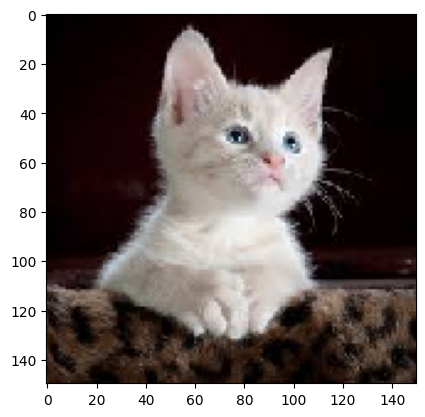

dog
[[1.]]
*************************************8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


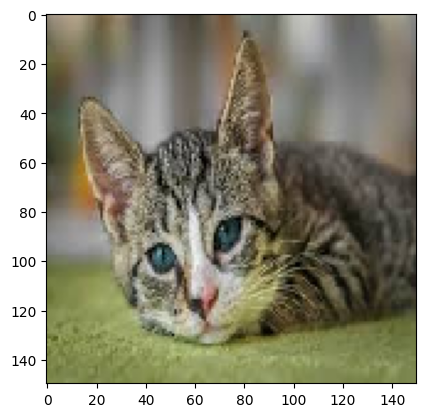

dog
[[1.]]
*************************************8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


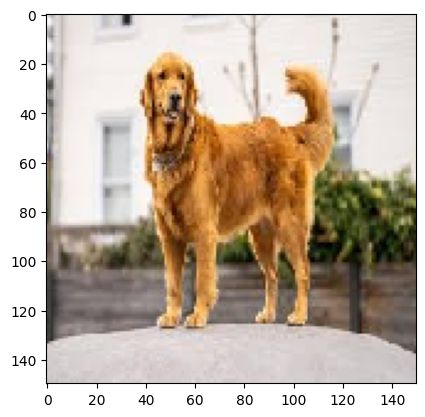

dog
[[1.]]
*************************************8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


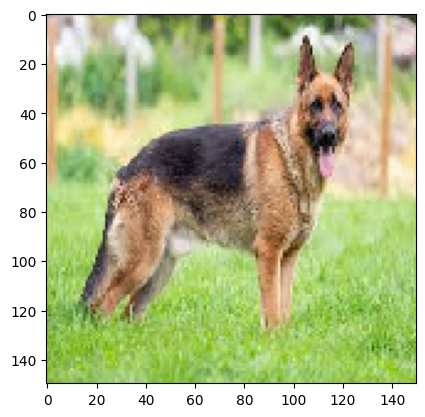

dog
[[1.]]
*************************************8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


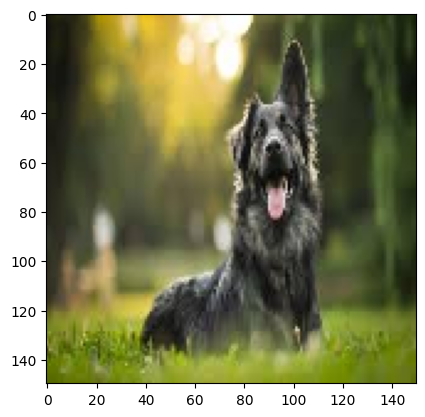

dog
[[1.]]
*************************************8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


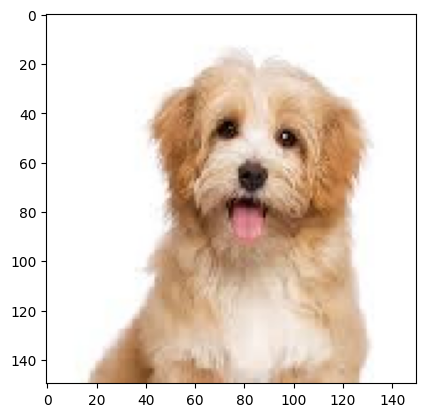

dog
[[1.]]
*************************************8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


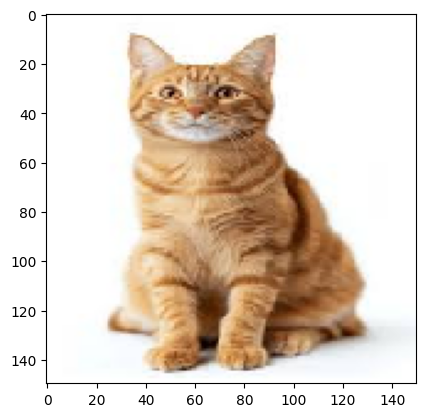

dog
[[1.]]
*************************************8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


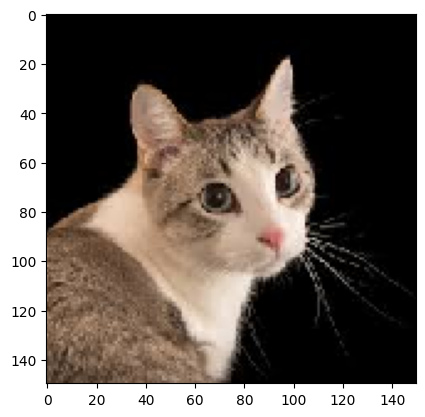

dog
[[1.]]
*************************************8


In [11]:
img_paths=['tests/c1.jpg','tests/c2.jpg','tests/d1.jpg','tests/d2.jpg','tests/d3.jpg','tests/d4.jpg','tests/c3.jpg','tests/c4.jpg']
for img_path in img_paths:
    img=tf.keras.utils.load_img(img_path,target_size=(150,150))
   
    x=tf.keras.utils.img_to_array(img)
    x=np.expand_dims(img,axis=0)
    result=classfier.predict(x)
    if result[0][0]>0.5:
        prediction='dog'
    else:
        prediction='cat'
    plt.imshow(img)
    plt.show()
    print(prediction) 
    print(result)
    print("*************************************8")    